The following table shows the number of yeast in the new laboratory...<br>
<table>
    <tr>
        <th>Time</th>
        <td>0</td>
        <td>2</td>
        <td>4</td>
        <td>6</td>
        <td>8</td>
        <td>10</td>
        <td>12</td>
        <td>14</td>
        <td>16</td>
        <td>18</td>
    </tr>
    <tr>
        <th>Yeast cells</th>
        <td>18</td>
        <td>39</td>
        <td>80</td>
        <td>171</td>
        <td>336</td>
        <td>509</td>
        <td>597</td>
        <td>640</td>
        <td>664</td>
        <td>672</td>
    </tr>
</table><br>
<ol>
    <li>Plot the data and use the plot to estimate the carrying capacity for the the yeast population.</li>
    <li>Use the data to estimate the initial population growth.</li>
    <li>Find both exponential and a logistic model for these.</li>
    <li>Compare the predicted values with the observed values between table and graph.</li>
    <li>Comment on how your model will fit the data.</li>

In [6]:
import matplotlib.pyplot as plt
from numpy import linspace, arange, log, e
from scipy.integrate import odeint
from sympy import Symbol, Function, Eq, dsolve, solve

# 

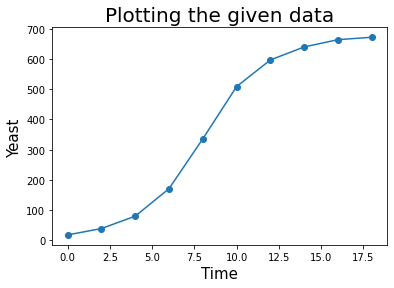

In [30]:
t = [0, 2, 4, 6, 8, 10, 12, 14, 16, 18]
y = [18, 39, 80, 171, 336, 509, 597, 640, 664, 672]
plt.plot(t, y, marker = 'o')
plt.xlabel("Time", size = 15)
plt.ylabel("Yeast", size = 15)
plt.title("Plotting the given data", size = 20)
None

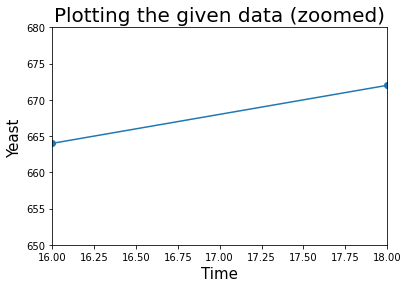

In [31]:
t = [0, 2, 4, 6, 8, 10, 12, 14, 16, 18]
y = [18, 39, 80, 171, 336, 509, 597, 640, 664, 672]
plt.plot(t, y, marker = 'o')
plt.xlabel("Time", size = 15)
plt.ylabel("Yeast", size = 15)
plt.title("Plotting the given data (zoomed)", size = 20)
plt.axis([16, 18, 650, 680])
None

From the above graph, the maximum carrying capacity seems to be between to 670 and 680. I am taking it as 680, to be on the safe side.

# 

In [9]:
print("Population at 1h = {0}".format(18))
print("Population at 2h = {0}".format(39))
print("Rate of change = Estimated inital growth rate = {0}".format((39 - 18)/18))

Population at 1h = 18
Population at 2h = 39
Rate of change = Estimated inital growth rate = 1.1666666666666667


# 

Exponential growth model is given by...
<br><br>
$\frac{dP}{dt} = -kP(t)$
<br><br>
where t is the time elapsed, and P is the current population, and k is the rate of growth per unit time.

Logistic growth model is given by...
<br><br>
$\frac{dP}{dt} = kP\frac{N - P}{N}$
<br><br>
where t is the time elapsed, P is the current population, k is the rate of growth per unit time, and N is carrying capacity i.e. the maximum that P is allowed to reach.

## Exponential model

First, to find the equation from the given differential equation and data...

In [10]:
t = Symbol('t') # Time
k = Symbol('k') # Proportional constant
P = Function('P')(t) # Population after time t
C1 = Symbol('C1') # Eventually arising integration constant

In [11]:
differentialEquation = Eq(P.diff(t), k * P)
generalEquation = dsolve(differentialEquation)
initalEquation = generalEquation.subs({t : 0, P : 18})
constant = solve(initalEquation, C1)
constant

[18]

In [12]:
particularEquation = generalEquation.subs({C1 : 18})
twoHoursLaterEquation = particularEquation.subs({t : 2, P : 39})
proportionalConstant = solve(twoHoursLaterEquation, k)
proportionalConstant

[-log(6) + log(78)/2, -log(6) + log(78)/2 + I*pi]

In [13]:
particularEquation = particularEquation.subs({k : -log(6) + log(78)/2})
particularEquation

Eq(P(t), 18*exp(0.386594944116741*t))

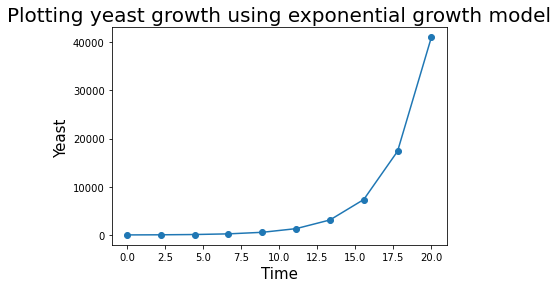

In [35]:
time = linspace(0, 20, 10)
y = 18 * e**(0.386594944116741 * time)
plt.plot(time, y, marker = 'o')
plt.xlabel("Time", size = 15)
plt.ylabel("Yeast", size = 15)
plt.title("Plotting yeast growth using exponential growth model", size = 20)
None

## Logistical growth model

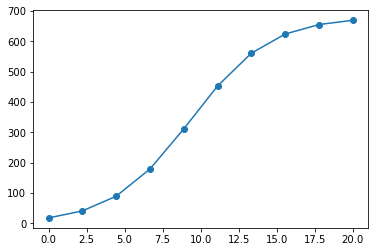

In [45]:
# k = 0.386594944116741
# Initial population = P0 = 18
# Approximate carrying capacity = N = 680
def yeast(P, t):
    eq = k * P * (1 - P/N)
    return eq
k = 0.386594944116741
N = 680
P0 = 18
t = linspace(0, 20, 10)
y = odeint(yeast, P0, t)
plt.plot(t, y, marker="o")
None

# 

From the graphs, we can see that while the exponential model does not follow the table values throughout, the logistic model follows the table values relatively closely. To confirm numerically, see below.

In [85]:
t = linspace(0, 20, 10)
y_exp = 18 * e**(0.386594944116741 * t)
y_log = odeint(yeast, P0, t)
y_original = [18, 39, 80, 171, 336, 509, 597, 640, 664, 672]

print("Original\tLogistic\tExponential")
for i in range(0, 10):
    print("{0}\t\t{1}\t\t{2}".format(round(y_original[i], 2), round(y_log[i][0], 2), round(y_exp[i], 2)))

Original	Logistic	Exponential
18		18.0		18.0
39		41.02		42.5
80		89.5		100.34
171		179.21		236.91
336		311.42		559.35
509		452.95		1320.64
597		560.91		3118.07
640		623.9		7361.88
664		655.05		17381.66
672		669.2		41038.69


# 

Based on the above comparisons, the logarithmic model predicts the data much more closely than the exponential model, especially for higher values of t. This closeness of prediction can be seen graphically, where the shape, scale and values of the graphs of the original data and the logistic model are very similar. This can also be seen numerically, where the values derived from the logistic model are usually close to the original data.